# Quantum Circuits

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/basics/quantum-circuits

## Circuits

There are different types of circuits such as:

* boolean circuits which work on binary values and have operators for AND, OR, and NOT
* arithmetic circuits which work on any set integer values with operators such as addition and multiplication
* quantum circuits which work on qubits and have unitary operators

In all cases, circuits are typically _not_ circular, meaning we always have acyclic circuits that don't have feedback loops in them. Below is an example of a single qubit, q, with the H, S, H, then T operators acting on it.

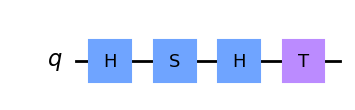

In [1]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

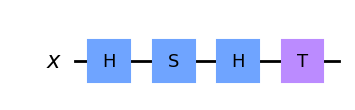

In [2]:
from qiskit import QuantumRegister

# Using a QuantumRegister, we can also rename our qubit, q, to be "x" in this case
X = QuantumRegister(1, "x")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)
circuit.draw()

**A note about ordering: when looking at the circuits drawn (examples above), the topmost qubit will have index 0 which is the _rightmost_ position in a Cartesian/tensor product. For example, if we have 001, then the 1 is represented at the topmost qubit. This follows the indexing convention know as little-endian.**

Quantum circuits can have any number of qubit wires and can also iniclude classical bit wires, indicated by double lines such as shown below:

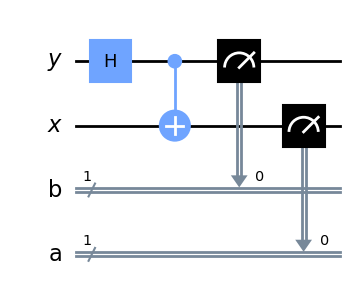

In [4]:
from qiskit import ClassicalRegister
X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)

circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw()

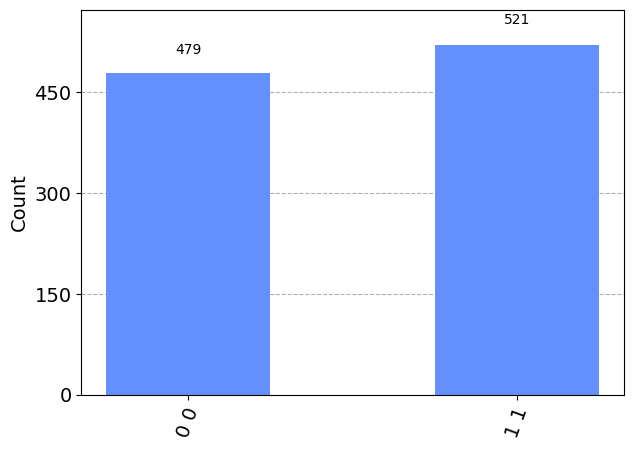

In [5]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

simulator = AerSimulator()
circuit_simulator = simulator.run(transpile(circuit,simulator), shots=1000)
statistics = circuit_simulator.result().get_counts()
plot_histogram(statistics)

## Inner products, orthonormality, and projections

#### Inner products

The inner product of two states $|\phi>$ and $|\psi>$ results in a scalar from taking the dot product of the complex conjugate of the amplitudes of $\phi$ and the amplitudes of $\psi$. There's a couple important facts about this operation though:

1. The inner product of any vector with itself results in the Euclidean norm square, which is always a nonnegative real number (positive definiteness) where it is 0 only if the entire state vector is 0.

2. There exists conjugate symmetry between of the inner product of a pair of state vectors in reverse order. Specifically, conjugate($<\psi|\phi>$) = $<\phi|\psi>$ and vice-versa.

3. The operations are linear/associate meaning that the inner product of state 1 and state 2 where state 2 is defined as a superposition of states can be evaluated as the inner product of state 1 on each of the superposed states of state 2 separately. This is also the case if state 1 is defined as a superposition but of course the complex conjugate would need to be expressed for the bra form of the vector.

4. The Cauchy-Schwarz inequality states that the inner product of two state vectors will always be less than or equal to the product of each state vector's euclidean norm. This makes sense just as it would in geometry where we take the dot product of 2 vectors where the max result occurs when the angle between them is 0 and it is simply the product of their magnitudes.

#### Orthogonal and orthonormal sets

Two vectors are said to be _orthogonal_ if their inner product is zero. We can geometrically visualize this as 2 vectors at right angles but we can also abstract this to be 2 systems with sets of elements that have no overlap.

We can then go on to describe a set of vectors as an _orthogonal set_ if every vector in the set is orthogonal to every other vector.

Furthermore, we can further define a set of vectors to be _orthonormal_ if they are all an orthogonal set AND every vector is a unit vector.

Lastly, a set of vectors can be described as an _orthonormal basis_ if the orthonormal set also forms a basis meaning that the set has size m where m is the dimension of the space.

Given an orthonormal set, this consists of a set of vectors that span a subset of the full dimension space. A procedure known as the Gram-Schmidt orthogonalization process can be used to construct the remaining vectors to create a full orthonormal basis.

Knowing some of the terminology from above, lets take a look at unitary matrices and realize a few things. If a matrix is unitary then:

1. The rows of U form an orthonormal set
2. The columns of U form an orthonormal set

This makes sense because we know that the columns represent the probability vectors for a specific input state and those probability vectors must be valid quantum states (ie have a euclidean norm of 1).  We know this must also be true of the rows because of the symmetry of unitary matrices as per the definition of $U^{\dagger}U = 1 = UU^{\dagger}$. 

Then, given any set of orthonormal vectors {$|\psi_1>, ..., |\psi^m>$} from an n dimensional space, we can always generate a unitary matrix U whose first m columns are the vectors from the orthonormal set and the last n-m columns are filled with vectors created from the GS process to form an orthonormal basis.

#### Projections and projective measurements

A square matrix $\Pi$ is a _projection_ if it meets the following conditions:

1. Hermitian meaning $\Pi = \Pi^{\dagger}$ and,
2. Idempotent meaning $\Pi^2 = \Pi$

An example of a projection is the matrix formed by $\Pi = |\psi><\psi|$ for any unit vector $\psi$. More generally, we can create a projection matrix using any orthonormal set {$|\psi_1>, ..., |\psi_m>$} through the following way:

$\Pi = \Sigma|\psi_k><\psi_k|$ for k = 1-m

If we are using standard basis vectors |0> and |1>, then we know that the matrix multiplication of each of these states to itself will result in a matrix with all zeros except for a 1 in the diagnal corresponding to the i=j=k row/column. If we are using the plus and minus states, then we won't necessarily get this result.

However, regardless of which orthonormal set used, we can describe a set of projections as _projective measurements_ if $\Pi_1 + ... + \Pi_m = 1$ where 1 is the identity matrix. That would also mean that m=n and thus the set of states is an orthogonal basis for the space.

For each k within {1, ..., m}, the outcome of a measurement k has a probability equal to $||\Pi_k|\psi>||^2$. Once a value of k is measured, then the state X gets updated as follows: $\Pi_k|\psi> / ||\Pi_k|\psi>||$. 

Standard basis measurements are projective measurements where $|\psi_k>$ are the standard basis vectors.

<font color=red>Question:</font> I don't think I quite get what the "so what" of this section of even the subtly of what its trying to express. Can we review/discuss the importance of this?

## Limitations on quantum information

### Irrelevance of global phases

Assume that we have two quantum states, $|\psi>$ and $|\phi>$ as well as a complex number $\alpha$ on the unit circle such that:

$|\phi> = \alpha|\psi>$

The vectors above can be described as _differing by a global phase_. Now consider a system that is in one of two quantum states that differ by a global phase and it undergoes a standard basis measurement. These are the results:

* If $|\psi>$, then probability of measuring classical state a is $|<a|\psi>|^2$<br>
* If $|\phi>$, then probability of measuring classical state a is $|<a|\phi>|^2$ = $|\alpha<a|\psi>|^2$ = $|\alpha|^2|<a|\psi>|^2$ = $|<a|\psi>|^2$

because $|\alpha|$ = 1. Therefore, the two states are completely indistinguishable no matter what operation or sequence of operations we apply to them, we will always get the $\alpha$ scalar value to carry through that disappears when measured. Therefore, any states that differ by a global phase are considered equivalent.

A _relative phase_ is what we observe between the plus state and minus state where there is a phase (-1) difference applied to a subset of the superposed states and this can be distinguished perfectly given a Hadamard gate and a measurement.

### No-cloning theorem

**Theorem (No-cloning theorem)**<br>
Let X and Y be systems sharing the same classical state set $\Sigma$ having at least two elements. There does not exist a quantum state $|\phi>$ of Y and a unitary operation U on the pair (X, Y) such that:

$U(|\psi> \otimes |\phi>) = |\psi> \otimes |\psi>$

for every state $|\psi>$ of X.

This basically states that there is no way to initialize the system Y to any state and then perform some unitary operation U on (X, Y) that could result in Y --> X (being cloned) for every state of $\psi>$.

The theorem is specifically about any universal operator for any arbitrary state. However, we can clone some specific states with specific operators. For example, we can clone any standard basis state using a controlled-NOT such that the target qubit is 0 if the control is 0 and becomes 1 if the control is 1.

Lastly, this theorem isn't exactly unique to quantum and holds true for even classical probabilisitic systems. This should make sense though because our probability vector holds information about our _knowledge_ of a system and not the objective reality. Thus, how can we clone any system (quantum or classical) if it has some degree of randomness in it (probabilistic).

### Non-orthogonal states cannot be perfectly discriminated

The last limitation is that given two quantum states $|\phi>$ and $|\psi>$ that are not orthogonal ($<\phi|\psi> \neq 0$), then its impossible to discriminate them perfectly. This limitation is actually a realization of the fact that if we do have a way to always perfectly discriminate two states without error, then they must be orthogonal.

Lets consider the situation where we have a circuit that applies a unitary operation (consisting of however many unitary gates we want) and it has the effect that when we apply it to state $|\phi>$ and measure the topmost qubit, we always get 0, and when we apply it to state $|\psi>$ and measure the topmost qubit, we always get 1.

In the case of the two states being |0> and |1>, we can always perfectly distinguish through a measurement of the computational basis. However, if we have states |0> and |+>, then when the state is actually 0, we will always measure 0 but when it is actually |+>, we will measure 0 half the time and 1 half the time. Thus, if we measure 1 in the computational basis then we know with certainty we have state |+>. However, if we measure 0 then we have a 50-50 on guessing correctly. This averages out to a 75% success rate but we can choose a different computational basis to measure on to increase our odds as high as 85% but it will never be 100%. So in 1 measurement, we will never be sure what state we really have.

<font color=red>Question:</font>What does this mean in practice? How is this a limitation? Can't we sample the results of the 2 states to get a distance measurement between them to distinguish them?